In [1]:
import json
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import svm

In [2]:
data = {}
with open('sampleUser.txt','r') as test_file:
    data = json.load(test_file)

In [3]:
print(data.keys())

dict_keys(['3flCPJBVYDSnh5LkFd0GKH', '49gN0mucMNktQQh6pNO1Hl', '4x6BaNpTLPzU3LWJuOLzY6', '4o0P62TCNyPEEpflpRaYtW', '11dUlzWkm2hUjyzYLSsgO0', '0qQ10bqzCKPUTuW1yebVuP', '6Mz5qpDape3YqxBZme5N4C', '11QnMO24E2oNe6pjH0xKTH', '5a1zvLJOYIZXGpFesJwtvx', '31Rnbf7DyWStoTDYCnzHIU', '37i9dQZF1E9Q1XURh0h1d1', '1h90L3LP8kAJ7KGjCV2Xfd', '2gnTZ4G8dpHce0vJEAZtS7'])


In [4]:
for playlist in data:
    for song in data[playlist]:
        features = list(data[playlist][song].keys())
        break

features.insert(0,"track")
features.append("inPlaylist")
print(features)

['track', 'duration', 'acousticness', 'loudness', 'liveness', 'tempo', 'valence', 'instrumentalness', 'danceability', 'mainKey', 'timeSignature', 'energy', 'inPlaylist']


In [5]:
rows = []

for playlist in data:
    for song in data[playlist]:
        row = [song]
        for feature in data[playlist][song]:
            row.append(data[playlist][song][feature])
        row.append(1)
        rows.append(row)

print(len(rows))

446


In [6]:
training_data = pd.DataFrame(rows, columns = features)

In [7]:
training_data

,track,duration,acousticness,loudness,liveness,tempo,valence,instrumentalness,danceability,mainKey,timeSignature,energy,inPlaylist
0,275a9yzwGB6ncAW4SxY7q3,0.685,0.0292,-5.503,0.3690,145.245,0.2660,0.000000,0.685,10.0,4.0,0.731,1
1,503OTo2dSqe7qk76rgsbep,0.816,0.1600,-3.323,0.0543,93.431,0.5270,0.000310,0.816,11.0,4.0,0.775,1
2,4Pwjz3DfvfQWV0rO2V8jyh,0.587,0.0152,-8.948,0.4420,133.954,0.0985,0.000000,0.587,1.0,4.0,0.698,1
3,2cDCojn6uIBM6A5xTAbl3H,0.487,0.0538,-6.815,0.4400,91.048,0.2170,0.000004,0.487,2.0,4.0,0.729,1
4,3kxfsdsCpFgN412fpnW85Y,0.745,0.1720,-10.425,0.1230,160.033,0.6070,0.009430,0.745,1.0,4.0,0.356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,6nek1Nin9q48AVZcWs9e9D,0.449,0.0509,-6.761,0.0833,139.631,0.2120,0.000087,0.449,5.0,4.0,0.585,1
442,0qcr5FMsEO85NAQjrlDRKo,0.543,0.5580,-6.850,0.1200,136.961,0.3710,0.000000,0.543,8.0,4.0,0.485,1
443,3w3y8KPTfNeOKPiqUTakBh,0.726,0.0490,-4.165,0.3090,143.994,0.8670,0.000000,0.726,5.0,4.0,0.698,1
444,60R2v9lheAu3lwZwAFxMZK,0.791,0.0986,-11.628,0.0765,143.017,0.8960,0.000000,0.791,1.0,4.0,0.613,1


In [9]:
data = {}
with open('genres.txt','r') as genres_file:
    data = json.load(genres_file)

In [10]:
rows = []


for song in data:
    row = [song]
    for feature in data[song]:
        row.append(data[song][feature])
    row.append(0)
    rows.append(row)

print(len(rows))

372


In [ ]:
genre_training_data = pd.DataFrame(rows, columns = features)

In [ ]:
genre_training_data

,track,duration,acousticness,loudness,liveness,tempo,valence,instrumentalness,danceability,mainKey,timeSignature,energy,inPlaylist
0,3M4KIpQaBlBqKVAQG9IrSj,0.674,0.254000,-7.083,0.1340,87.095,0.4970,0.0000,0.674,9.0,4.0,0.443,0
1,2N9fRKRit7MEYO4snHENdh,0.642,0.832000,-5.529,0.1960,119.894,0.6090,0.0000,0.642,9.0,4.0,0.324,0
2,6erIiexk3JR6DwvJEC8cDO,0.716,0.005080,-8.560,0.3560,98.591,0.1510,0.6620,0.716,1.0,4.0,0.809,0
3,19hDHreOgooLfOz9WXp5Z4,0.233,0.893000,-12.499,0.0856,127.892,0.1040,0.0173,0.233,10.0,5.0,0.214,0
4,5EpYp4YeaPMDvt790RQRXQ,0.643,0.001390,-2.970,0.3180,129.960,0.5030,0.6660,0.643,2.0,4.0,0.846,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,53W8npbWVQo61IR8R88pra,0.715,0.031100,-6.582,0.0737,115.955,0.2620,0.0000,0.715,10.0,4.0,0.825,0
2286,5RHG4SQ6iJ1qQJmt3EFJCX,0.502,0.012700,-6.299,0.1620,149.186,0.9220,0.0000,0.502,4.0,4.0,0.924,0
2287,01Mpj13vURSO3cCLprPt5T,0.294,0.000489,-4.383,0.1280,88.777,0.0379,0.3310,0.294,1.0,4.0,0.995,0
2288,0fiiD4KO4mAGnVkJnclJsh,0.666,0.745000,-4.145,0.9000,143.966,0.6740,0.0000,0.666,0.0,4.0,0.940,0


In [ ]:
commonSongs = list(set(training_data.track) & set(genre_training_data.track))
commonSongs

['1tjY4H0X706ZH03SXa1DFh',
 '6HSqyfGnsHYw9MmIpa9zlZ',
 '6JEntXLt4z98CcDtIH9sU7',
 '457p7UH7hoHrbA2iI4PSCA',
 '2ciMN5X2mLSwwnTX2V8oVS',
 '2Z8WuEywRWYTKe1NybPQEW',
 '1KK0j3djUgx5tuOMwesdAT',
 '7sO5G9EABYOXQKNPNiE9NR',
 '6HFbq7cewJ7rPiffV0ciil',
 '5HQVUIKwCEXpe7JIHyY734',
 '6GpcFTcLIc0eeR7Q7dVMXZ',
 '5JLv62qFIS1DR3zGEcApRt',
 '3YJlTDtUXu1sGh8lunblkG',
 '2RUFzxyUlI36KKy9Agkqze',
 '6NPVjNh8Jhru9xOmyQigds',
 '5knuzwU65gJK7IF5yJsuaW',
 '43wzy7JxMEfvCh8ZFeZKYk',
 '6TaqooOXAEcijL6G1AWS2K',
 '3bidbhpOYeV4knp8AIu8Xn',
 '55h7vJchibLdUkxdlX3fK7',
 '4KUR9agGDxQZURJ9liWVHD',
 '4JIo8RztBbELr2gWJ5OGK6',
 '2n5gVJ9fzeX2SSWlLQuyS9',
 '7MmG8p0F9N3C4AXdK6o6Eb',
 '3cNjgVBKTJ1SvKhunrCdVy',
 '0i5el041vd6nxrGEU8QRxy',
 '7pNC5ZIKtwUK0ReSpM3P9f',
 '1mea3bSkSGXuIRvnydlB5b',
 '2ihCaVdNZmnHZWt0fvAM7B',
 '1hWYT0w2R0J19rlVkiez7X',
 '7EYWEwJyai7udNmqvRPsZM',
 '5nN8BwAQDJDguq7Dpd3JQQ',
 '0Nk7bSn0MItonkR0GNs3mj',
 '2374M0fQpWi3dLnB54qaLX',
 '7tAXHZdp9UpcYrHn7MZqfo',
 '74fpNVAJrKGQuqHETi4WSt',
 '6TwfdLbaxTKzQi3AgsZNzx',
 

In [ ]:
genre_training_data.loc[genre_training_data['track'].isin(commonSongs),"inPlaylist"] = 1

In [ ]:
genre_training_data

,track,duration,acousticness,loudness,liveness,tempo,valence,instrumentalness,danceability,mainKey,timeSignature,energy,inPlaylist
0,3M4KIpQaBlBqKVAQG9IrSj,0.674,0.254000,-7.083,0.1340,87.095,0.4970,0.0000,0.674,9.0,4.0,0.443,0
1,2N9fRKRit7MEYO4snHENdh,0.642,0.832000,-5.529,0.1960,119.894,0.6090,0.0000,0.642,9.0,4.0,0.324,0
2,6erIiexk3JR6DwvJEC8cDO,0.716,0.005080,-8.560,0.3560,98.591,0.1510,0.6620,0.716,1.0,4.0,0.809,0
3,19hDHreOgooLfOz9WXp5Z4,0.233,0.893000,-12.499,0.0856,127.892,0.1040,0.0173,0.233,10.0,5.0,0.214,0
4,5EpYp4YeaPMDvt790RQRXQ,0.643,0.001390,-2.970,0.3180,129.960,0.5030,0.6660,0.643,2.0,4.0,0.846,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,53W8npbWVQo61IR8R88pra,0.715,0.031100,-6.582,0.0737,115.955,0.2620,0.0000,0.715,10.0,4.0,0.825,0
2286,5RHG4SQ6iJ1qQJmt3EFJCX,0.502,0.012700,-6.299,0.1620,149.186,0.9220,0.0000,0.502,4.0,4.0,0.924,0
2287,01Mpj13vURSO3cCLprPt5T,0.294,0.000489,-4.383,0.1280,88.777,0.0379,0.3310,0.294,1.0,4.0,0.995,0
2288,0fiiD4KO4mAGnVkJnclJsh,0.666,0.745000,-4.145,0.9000,143.966,0.6740,0.0000,0.666,0.0,4.0,0.940,0


In [ ]:
combined_training_data = pd.concat([training_data,genre_training_data],ignore_index=True)

In [ ]:
combined_training_data

,track,duration,acousticness,loudness,liveness,tempo,valence,instrumentalness,danceability,mainKey,timeSignature,energy,inPlaylist
0,25F6MWrnFBCXVnpN4n76EK,0.710,0.059100,-6.457,0.1340,170.193,0.8160,0.000,0.710,2.0,4.0,0.888,1
1,4RY96Asd9IefaL3X4LOLZ8,0.902,0.260000,-2.776,0.0749,90.059,0.8050,0.000,0.902,6.0,4.0,0.720,1
2,2HyjslXPfwBapec3F6FppD,0.354,0.315000,-7.159,0.6020,75.040,0.3210,0.000,0.354,3.0,4.0,0.500,1
3,1JFx9R87En9oJOi4DRH1e9,0.669,0.070300,-7.549,0.1520,97.990,0.5730,0.000,0.669,10.0,4.0,0.740,1
4,3iVcZ5G6tvkXZkZKlMpIUs,0.796,0.074200,-5.974,0.0827,110.034,0.5580,0.000,0.796,7.0,4.0,0.766,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4730,53W8npbWVQo61IR8R88pra,0.715,0.031100,-6.582,0.0737,115.955,0.2620,0.000,0.715,10.0,4.0,0.825,0
4731,5RHG4SQ6iJ1qQJmt3EFJCX,0.502,0.012700,-6.299,0.1620,149.186,0.9220,0.000,0.502,4.0,4.0,0.924,0
4732,01Mpj13vURSO3cCLprPt5T,0.294,0.000489,-4.383,0.1280,88.777,0.0379,0.331,0.294,1.0,4.0,0.995,0
4733,0fiiD4KO4mAGnVkJnclJsh,0.666,0.745000,-4.145,0.9000,143.966,0.6740,0.000,0.666,0.0,4.0,0.940,0


In [ ]:
index_to_track = {}
for index, row in combined_training_data.iterrows():
    index_to_track[index] = row['track']
index_to_track

{0: '25F6MWrnFBCXVnpN4n76EK',
 1: '4RY96Asd9IefaL3X4LOLZ8',
 2: '2HyjslXPfwBapec3F6FppD',
 3: '1JFx9R87En9oJOi4DRH1e9',
 4: '3iVcZ5G6tvkXZkZKlMpIUs',
 5: '2vmxF4cWxi9v9Lv055SfXt',
 6: '3JsPQbdGRRN6C7n8OsNTnj',
 7: '6gBFPUFcJLzWGx4lenP6h2',
 8: '5qN4HFkapdAOV94XPryVof',
 9: '285pBltuF7vW8TeWk8hdRR',
 10: '2ycWek3FNNVHBhz2TcnOzZ',
 11: '2wtJbMAEeCICHkszAggSw4',
 12: '7F1LWA9sIlTorHUo4amGqk',
 13: '3DoBTwfr8yi2LN08SBpFkN',
 14: '7rdjfrTBMNt3KaaGvSv3YG',
 15: '62itulOgU4flQFuI7f7JF8',
 16: '1kBbgxAUc4HQv7cgIayIDH',
 17: '32lmL4vQAAotg6MrJnhlQZ',
 18: '5iDUgE0T7WGJAiGuupxlwq',
 19: '3fyMH1t6UPeR5croea9PrR',
 20: '5QdeLP1eyBTlOmzGXuzwWq',
 21: '6lBHdelbmRhfkN9IxCN9BI',
 22: '1Dk3CfJEtqvj7Xg2AWwfEn',
 23: '2NjeQLvFsfeKdZoA7dbfL1',
 24: '3pXF1nA74528Edde4of9CC',
 25: '1lItf5ZXJc1by9SbPeljFd',
 26: '304CtPEPYQS6hbM4CubVti',
 27: '7zLYKWcXnYeHHWidalz7rj',
 28: '5l5IjBzuVWog64CYMmGqzu',
 29: '51rXHuKN8Loc4sUlKPODgH',
 30: '5RIVoVdkDLEygELLCniZFr',
 31: '2KB0DJBN3GPoXe9ZJPKE3u',
 32: '37XDM9pTC8De

In [ ]:
combined_training_data['inPlaylist'].value_counts(normalize=True) * 100

1    52.650475
0    47.349525
Name: inPlaylist, dtype: float64

In [ ]:
 # Check for NA Values
combined_training_data.isnull().sum()

track               0
duration            0
acousticness        0
loudness            0
liveness            0
tempo               0
valence             0
instrumentalness    0
danceability        0
mainKey             0
timeSignature       0
energy              0
inPlaylist          0
dtype: int64

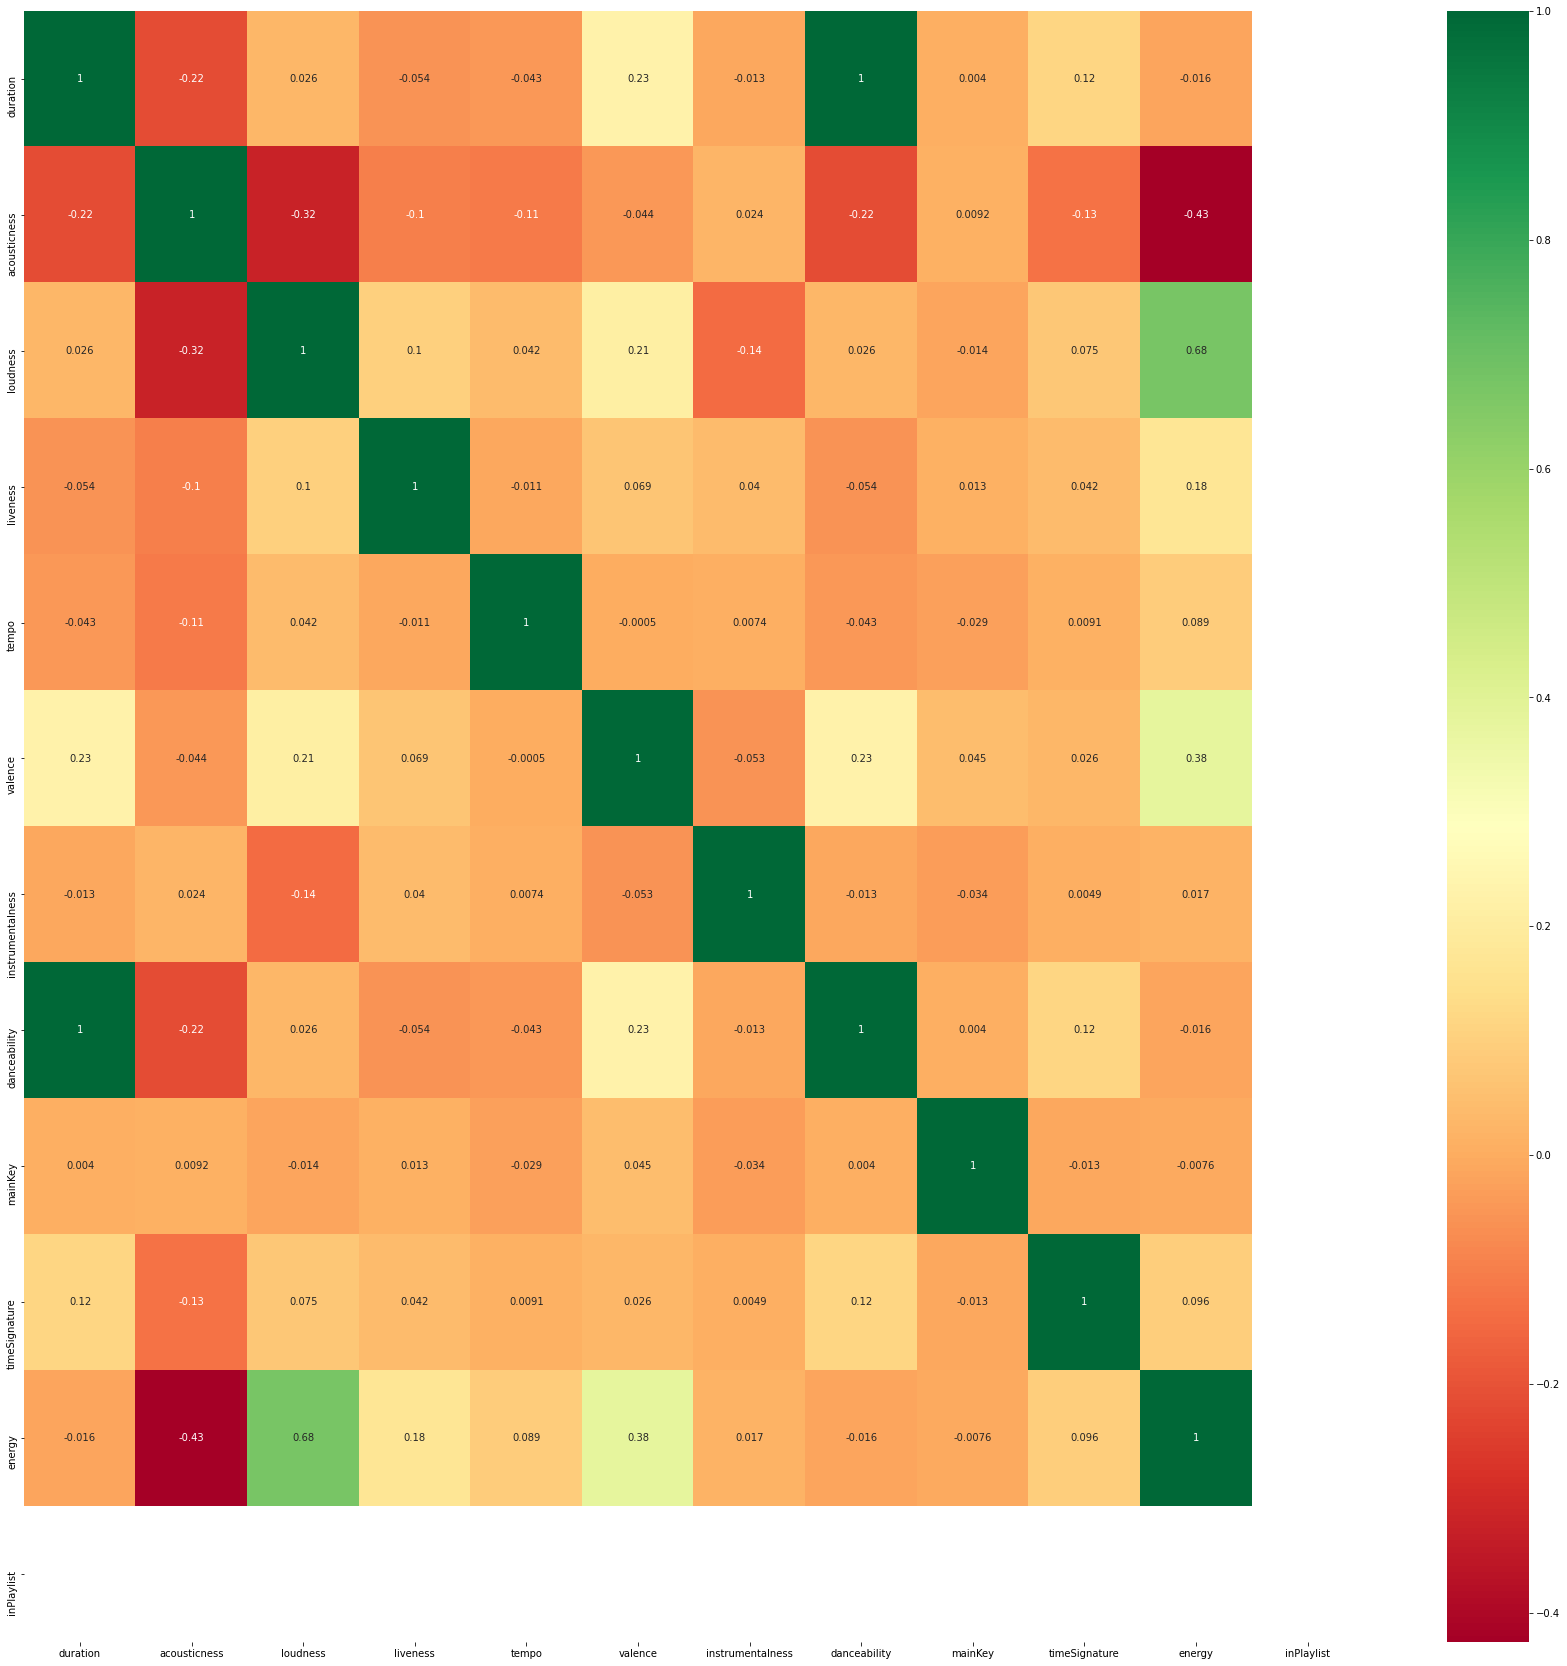

In [ ]:
corrmat = combined_training_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (30,30))
g = sns.heatmap(training_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Logistic Regression (76%)
X = combined_training_data.drop(['track','inPlaylist'], axis=1)
y = combined_training_data['inPlaylist']
lr = LogisticRegressionCV(cv=5, random_state=42).fit(X, y)
lr.score(X, y)


0.7613516367476241

In [ ]:
# SVM (74%)

# Scale Features 
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
svm = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(svm, X_scaled, y, cv=5)
scores.mean()

0.7484688489968321

In [ ]:
honey = pd.read_csv('amrita_songs.csv')
honey = honey.drop(columns = ['Unnamed: 0'])

In [ ]:
honey.columns

Index(['track', 'duration', 'acousticness', 'loudness', 'liveness', 'tempo',
       'valence', 'instrumentalness', 'danceability', 'mainKey',
       'timeSignature', 'energy', 'inPlaylist'],
      dtype='object')

In [ ]:
honeys_index_to_track = {}
for index, row in honey.iterrows():
    honeys_index_to_track[index] = row['track']
honeys_index_to_track

{0: '2ota18jyZVMGvwQ0IV8qz7',
 1: '5uaIbU3oHHcSOK6WFNK5nj',
 2: '0QjiywAse0jM8QgPvtJrpC',
 3: '646OD5HyK4hBHQ04oW8tDJ',
 4: '3Q8yDujnXxwRiZ4p6VqY7b',
 5: '3WDyyVkgDH9RevYWm4Nqa2',
 6: '1UwYGugCEpIz6AgHwx5f2d',
 7: '0joXv5niso2T8YXWOlIe1X',
 8: '3kSYKolWOj0yZMWFqwcCBs',
 9: '3nKEiJUeaWn8q2O9I1xwlB',
 10: '2tjWCe2W7sgvS3C8NHcdtI',
 11: '352wEkChkiClswqwDoM0nj',
 12: '3s1V1U2pLph50HvhsgRCF0',
 13: '3W1XPf7mvuQcWQB7U7MbTM',
 14: '39ujbBjTwwqUFySaCYDMMT',
 15: '2X5L8VSztTCEnqfO2fc4wM',
 16: '4e9dIemIXO8Tzg0k4aWujk',
 17: '6fofcNP93tUM6CgkBSxo0B',
 18: '6NTwjo8MMAg0Ht2OlKdDir',
 19: '52itZ0w0CydihB2JCZEIft',
 20: '5yDtBUvjNse5mr5887lj59',
 21: '5QyOjKJhR1iyF0DHQM2IvW',
 22: '13PEn5wpdODf4mL0d6pudn',
 23: '3uoQUnKEedaeLKxUeVaJwj',
 24: '6MRuNaMaH65vGyek33fXMV',
 25: '2ewQSWGHM8yM5RnDHkn7RJ',
 26: '3uL1IBFhg52VcQqOwAG01E',
 27: '63qRT3ZJfnsjWHVUhhbAZ3',
 28: '0Kd2IhGYGYrOATgOOnDBzI',
 29: '7cLGKaJXLFpUU7Up34vVr1',
 30: '2UE5pVmMGjfD5XUQTpYpD6',
 31: '4qRcjFkFqSpLBzcbLDt7HL',
 32: '2mwBSO58y92E

In [ ]:
honey = honey.drop(columns = ['track'])

In [ ]:
honey_X = honey.drop(['inPlaylist'], axis=1)
preds = lr.predict_proba(honey_X)


In [ ]:
preds

array([[0.50338284, 0.49661716],
       [0.27522383, 0.72477617],
       [0.10955548, 0.89044452],
       ...,
       [0.38631218, 0.61368782],
       [0.09341632, 0.90658368],
       [0.40667641, 0.59332359]])

In [ ]:
recs = []
for index, rec in enumerate(preds):
    if rec[1] >= 0.76 and honeys_index_to_track[index] not in training_data:
        recs.append(index)

In [ ]:
track_recs = []
for index in recs:
    track_recs.append(honeys_index_to_track[index])


In [ ]:
len(track_recs)

367

In [ ]:
to_remove = list(set(track_recs) & set(training_data.track))
for track in to_remove:
    track_recs.remove(track)

In [ ]:
len(track_recs)

222

In [ ]:
track_recs

['3uoQUnKEedaeLKxUeVaJwj',
 '6cWkLlz7E2YN9Qk50UThf1',
 '3bHI0o9TLQ2jJzjr0ES7dX',
 '0OrBLnWKN7bI60IXPYi8F6',
 '5VGINWbl9DKfr8a9QiCeOX',
 '26IiCsuDiFR7wtlypEx7IA',
 '342pJxy678kgQrZXCL9RG7',
 '28veUNu4veN0LOBVa0nFw8',
 '3G8o2zm7LaF6eeVuvLlrkJ',
 '4pBxb7WuLsC3YyA9cj4T2l',
 '7gAyu0od48mkaCw1laPKVC',
 '64RkEV5b7bG697vhIPMlrl',
 '4AoQVhME8Ko6LNm4lV2wwQ',
 '6vKTm5I3Nqpw6CJt7NgHLz',
 '5I3Xih0C2ID3fqngBrBbGv',
 '6N6mJlsjYRV0yoMSPS5JiQ',
 '4H2wyTfSobQHsVnt2JYPMf',
 '1eFH9kh7L63Zb8FDqjbwZJ',
 '1bLNqR3bqpyWkwWKECjVrw',
 '42nkVBjWYVhiijbof5zySm',
 '0a6zRnrjmaOcqsEIFkXIhw',
 '28ltIq2Kff5ntb9Bi19RDZ',
 '7hNYvX0qAKrxtVr1jGDmvR',
 '7wW9scVNLYFLsmBb1yAUmS',
 '4Tid4MwqgR1CfKCun3tFon',
 '4vUmTMuQqjdnvlZmAH61Qk',
 '6uSSupG4TMu3vW8QgynAB6',
 '1rgnBhdG2JDFTbYkYRZAku',
 '4X70hLzIDfY5T2BcsOcv6Q',
 '67mqtupEG49a5TmGgyO6Xc',
 '2u02eLj96Atd6TBxkH9YvN',
 '0FE9t6xYkqWXU2ahLh6D8X',
 '2Cby9QLsraYQ5Thh7GbxIh',
 '5w9c2J52mkdntKOmRLeM2m',
 '4TwIbmabI2R5XUhqptk6Ev',
 '7k4t7uLgtOxPwTpFmtJNTY',
 '3XaWuYsTtnkzCSBr0RmROc',
 